# Ejercicios 3

## 1. Customer Data

Customer Data --> EDA + { Bernoulli, Multinomial, Gaussian }

In [5]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [6]:
dataset = pd.read_csv('custData.csv')
dataset
print(dataset.head(20))

            age  income student credit_rating class
0         youth    high      no          fair    no
1         youth    high      no     excellent    no
2   middle_aged    high      no          fair   yes
3        senior  medium      no          fair   yes
4        senior     low     yes          fair   yes
5        senior     low     yes     excellent    no
6   middle_aged     low     yes     excellent   yes
7         youth  medium      no          fair    no
8         youth     low     yes          fair   yes
9        senior  medium     yes          fair   yes
10        youth  medium     yes     excellent   yes
11  middle_aged  medium      no     excellent   yes
12  middle_aged    high     yes          fair   yes
13       senior  medium      no     excellent    no


In [7]:
# EDA
dataset_n = dataset.copy()

labelencoder = LabelEncoder()
dataset_n.iloc[:, 0] = labelencoder.fit_transform(dataset.iloc[:, 0])
dataset_n.iloc[:, 1] = labelencoder.fit_transform(dataset.iloc[:, 1])
dataset_n.iloc[:, 2] = labelencoder.fit_transform(dataset.iloc[:, 2])
dataset_n.iloc[:, 3] = labelencoder.fit_transform(dataset.iloc[:, 3])

dataset_n
# Naive Bayes Bernouilli


age  income  student  credit_rating class
0     2       0        0              1    no
1     2       0        0              0    no
2     0       0        0              1   yes
3     1       2        0              1   yes
4     1       1        1              1   yes
5     1       1        1              0    no
6     0       1        1              0   yes
7     2       2        0              1    no
8     2       1        1              1   yes
9     1       2        1              1   yes
10    2       2        1              0   yes
11    0       2        0              0   yes
12    0       0        1              1   yes
13    1       2        0              0    no

In [8]:
X = dataset_n.iloc[:, 0:4]
y = dataset_n.iloc[:, 4]

# diviendo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 17)

In [9]:
# Aplicando Bernoulli
BernNB = BernoulliNB(binarize = 0.1) #alpha Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
# class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
# fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
BernNB.fit(X_train, y_train)
print(BernNB)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)


In [10]:
y_expect = y_test
y_pred = BernNB.predict(X_test)
accuracy_results = { 'Bernoulli': 0, 'Multinomial': 0, 'Gaussian': 0 }
accuracy_results['Bernoulli'] = accuracy_score(y_expect, y_pred)

In [11]:
# Aplicando Multinomial
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)
y_pred = MultiNB.predict(X_test)
accuracy_results['Multinomial'] = accuracy_score(y_expect, y_pred)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [12]:
# Aplicando Gaussian
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
print(GaussNB)
y_pred = GaussNB.predict(X_test)
accuracy_results['Gaussian'] = accuracy_score(y_expect, y_pred)

GaussianNB(priors=None, var_smoothing=1e-09)


In [13]:
# Comparacion
accuracy_results

{'Bernoulli': 0.4, 'Multinomial': 0.6, 'Gaussian': 0.6}

## 2. Customer Data --> EDA + MixedNB

In [14]:
from mixed_naive_bayes import MixedNB # se usa en el caso de que sean variables categoricas y numericas

dataset_n.iloc[:, 4] = labelencoder.fit_transform(dataset.iloc[:, 4]) # Convirtiendo a numerico
X = dataset_n.iloc[:, 0:4]
y = dataset_n.iloc[:, 4]
print(dataset_n)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 17)

clf = MixedNB(categorical_features=[0,1,2,3])

    age  income  student  credit_rating  class
0     2       0        0              1      0
1     2       0        0              0      0
2     0       0        0              1      1
3     1       2        0              1      1
4     1       1        1              1      1
5     1       1        1              0      0
6     0       1        1              0      1
7     2       2        0              1      0
8     2       1        1              1      1
9     1       2        1              1      1
10    2       2        1              0      1
11    0       2        0              0      1
12    0       0        1              1      1
13    1       2        0              0      0


In [15]:
clf.fit(X,y)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8


### 3. wineNB { Bernoulli, Multinomial, Gaussian }

In [16]:
from sklearn import datasets
wine = datasets.load_wine()
# convirtiendo en DataFrame
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data = features
data['target']=wine['target']
data['class']=data['target'].map(lambda ind: wine['target_names'][ind])
data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target    class  
0                          3.92   1065.0       0  class_0  
1                          3.40   1050.0       0  class_0  
2                          3.17   1185.0       0  class_0  
3                          3.45   1480.0       0  class_0  
4                          2.93    735.0       0  class_0

In [17]:
# EDA
# Correlacion
import matplotlib.pyplot as plt
import seaborn as sb

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

alcohol


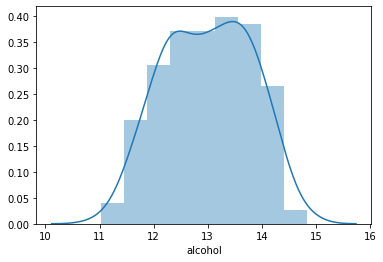

malic_acid


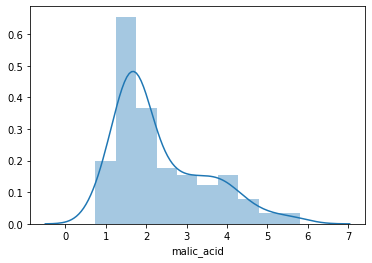

ash


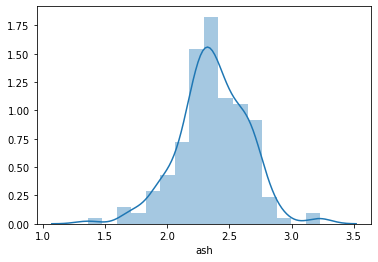

alcalinity_of_ash


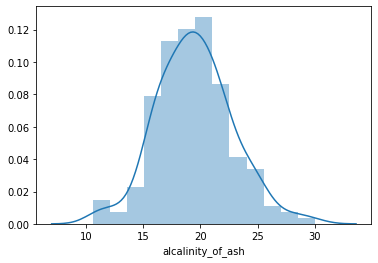

magnesium


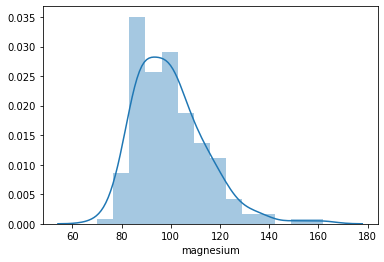

total_phenols


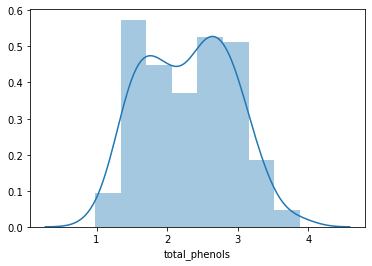

flavanoids


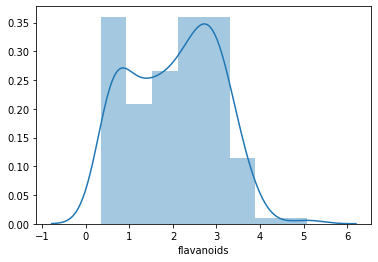

nonflavanoid_phenols


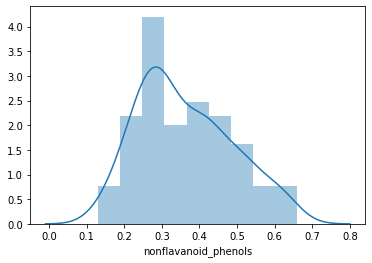

proanthocyanins


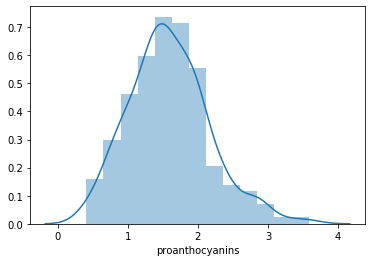

color_intensity


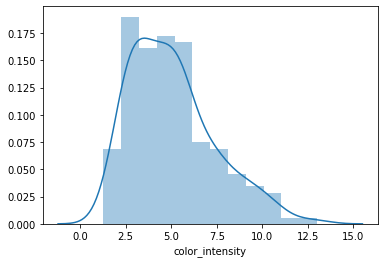

hue


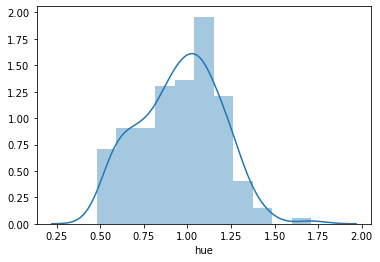

od280/od315_of_diluted_wines


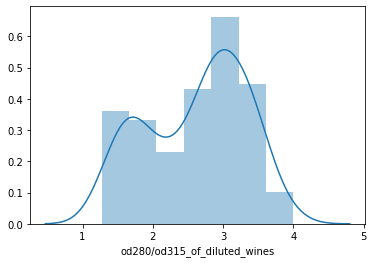

proline


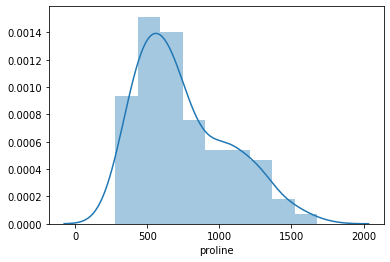

target


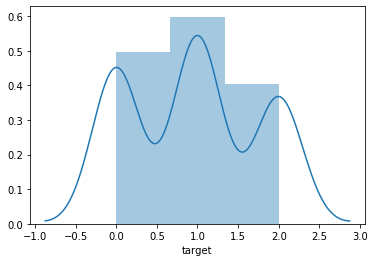

class


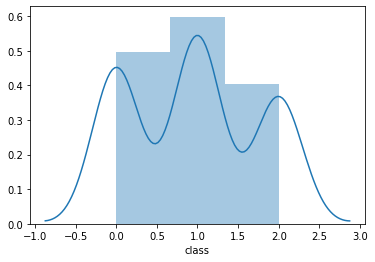

In [18]:
# data.describe()
data.iloc[:,14]
# convirtiendo a categorica numerica
data.iloc[:, 14] = labelencoder.fit_transform(data.iloc[:, 14])

for col in data.columns:
    print(col)
    sb.distplot(data[col])
    plt.show()

In [19]:
Las gráficas de las variables no parecen tener una variación pequeña y las variables son en sy mayoría numéricas,
salvo las dos últimas que se pueden representar como categóricas numéricas. Obteniendo nuevamente la matriz de 
correlación:

SyntaxError: invalid syntax (<ipython-input-19-6b08abf478e2>, line 1)

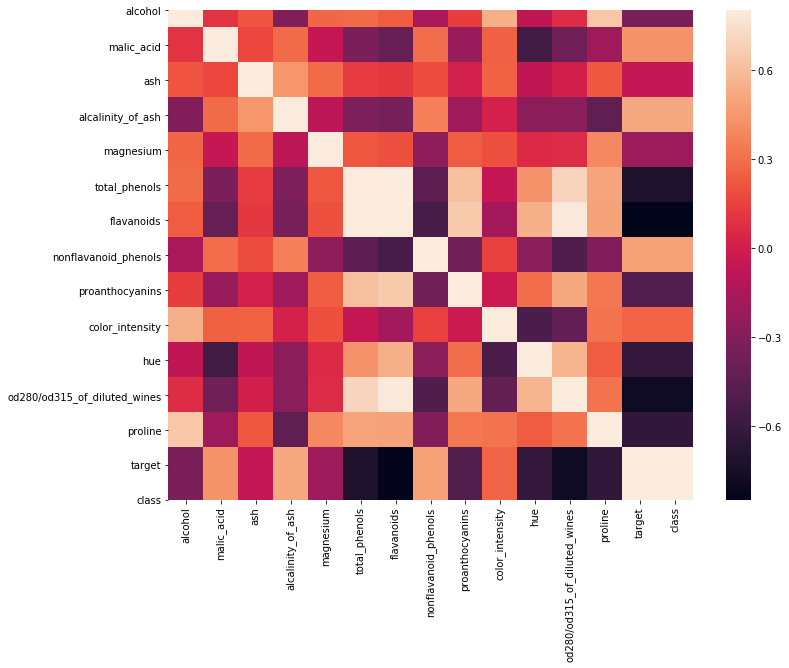

In [20]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

Como `target` y `class` son iguales se puede descartar una.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
class                           178 non-null int64
dtypes: float64(13), int64(2)
memory usage: 21.0 KB


Los feaures no tienen valores null o NaN

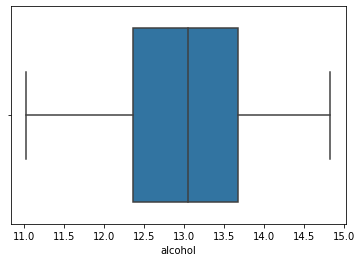

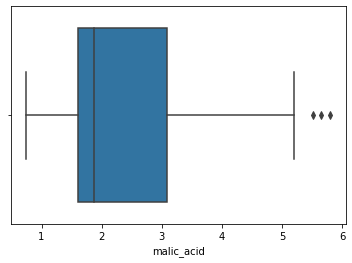

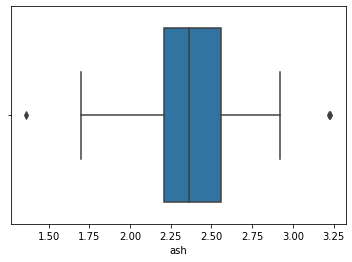

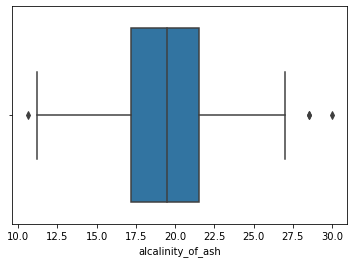

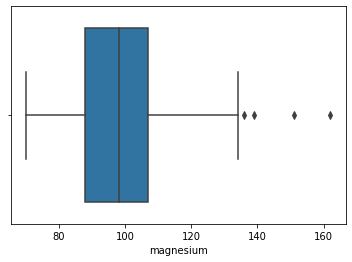

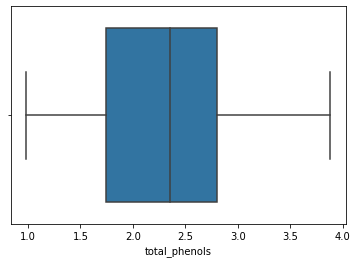

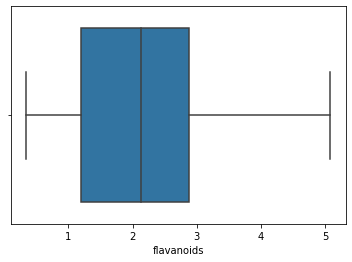

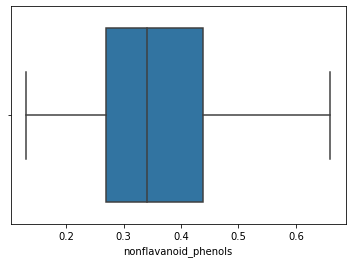

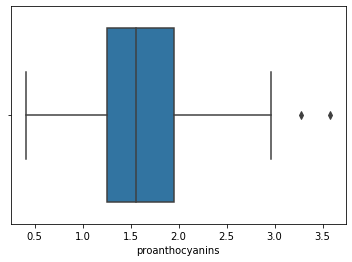

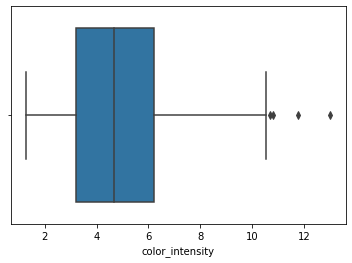

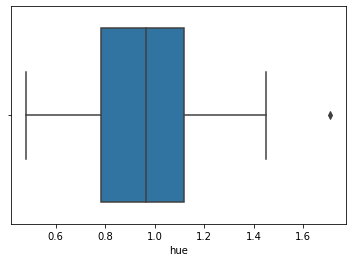

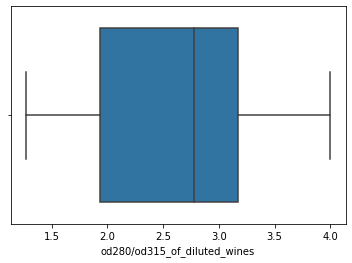

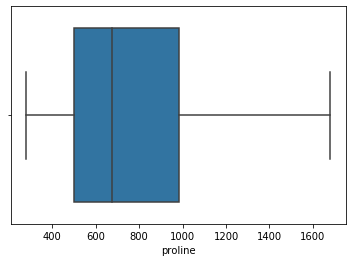

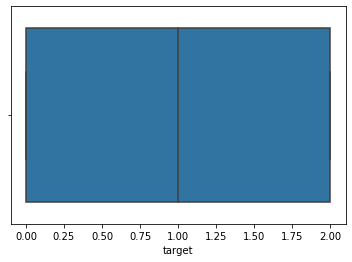

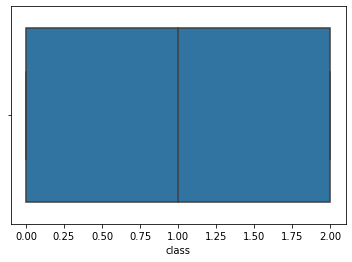

In [22]:
# Para visualizar outliers
for col in data.columns:
    sb.boxplot(x=col,data=data)
    plt.show()

In [23]:
data['alcalinity_of_ash'].describe()


count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: alcalinity_of_ash, dtype: float64

In [24]:
# Aplicano Naive Bayes
X = data.iloc[:, 0:13]
y = data.iloc[:, 13]

# Bernoulli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=32)

In [25]:
# Aplicando Bernoulli
BernNB = BernoulliNB(binarize = 0.1) #alpha Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
# class_prior: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
# fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print('Bernoulli accuracy:', accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
Bernoulli accuracy: 0.2962962962962963


In [26]:
# Aplicando Multinomial
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)
y_pred = MultiNB.predict(X_test)
print('Multinomial accuracy:', accuracy_score(y_expect, y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Multinomial accuracy: 0.8703703703703703


In [27]:
# Aplicando Gaussian
GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)
print(GaussNB)
y_pred = GaussNB.predict(X_test)
print('Gaussian accuracy:', accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Gaussian accuracy: 0.9814814814814815


In [28]:
print(data)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan